In [1]:
import h5py
f = h5py.File(r'data\TaxiBJ\BJ16_M32x32_T30_InOut.h5')
# print(f.keys())
for ke in f.keys():
    print(ke, f[ke])

data <HDF5 dataset "data": shape (7220, 2, 32, 32), type "<f8">
date <HDF5 dataset "date": shape (7220,), type "|S10">



data shape: (7220, 2, 32, 32)
of days: 162, from 2015-11-01 to 2016-04-10
of timeslots: 7776
of timeslots (available): 7220
missing ratio of timeslots: 7.2%
max: 1250.000, min: 0.000


In [2]:
import numpy as np

data_np = np.array(f['data'])
date_np = np.array(f['date'])

In [3]:
print(data_np[:,0,0,0].shape)
print(type(date_np[0]))

(7220,)
<class 'numpy.bytes_'>


In [4]:
date_np_int = date_np.astype(int)
date_np_int = date_np_int - 1
date_np_bytes = date_np_int.astype(np.bytes_)

In [5]:
import pandas as pd
from datetime import datetime

years = [int(d[:4]) for d in date_np]
months = [int(d[4:6]) for d in date_np]
days = [int(d[6:8]) for d in date_np]
counts = [int(d[8:]) for d in date_np_bytes]

dates = []
for year, month, day, count in zip(years, months, days, counts):
    hour = count // 2
    minute = (count % 2) * 30
    date = datetime(year, month, day, hour, minute)
    dates.append(date)


In [22]:
import pandas as pd
df = pd.DataFrame(data_np[:,0,21, 6])
df.set_index(pd.Index(dates), inplace=True)
print(df.iloc[-816:])

                         0
2016-03-24 00:30:00  129.0
2016-03-24 01:00:00   99.0
2016-03-24 01:30:00   62.0
2016-03-24 02:00:00   56.0
2016-03-24 02:30:00   43.0
...                    ...
2016-04-09 22:00:00  121.0
2016-04-09 22:30:00  113.0
2016-04-09 23:00:00  104.0
2016-04-09 23:30:00   81.0
2016-04-10 00:00:00   12.0

[816 rows x 1 columns]


<Axes: >

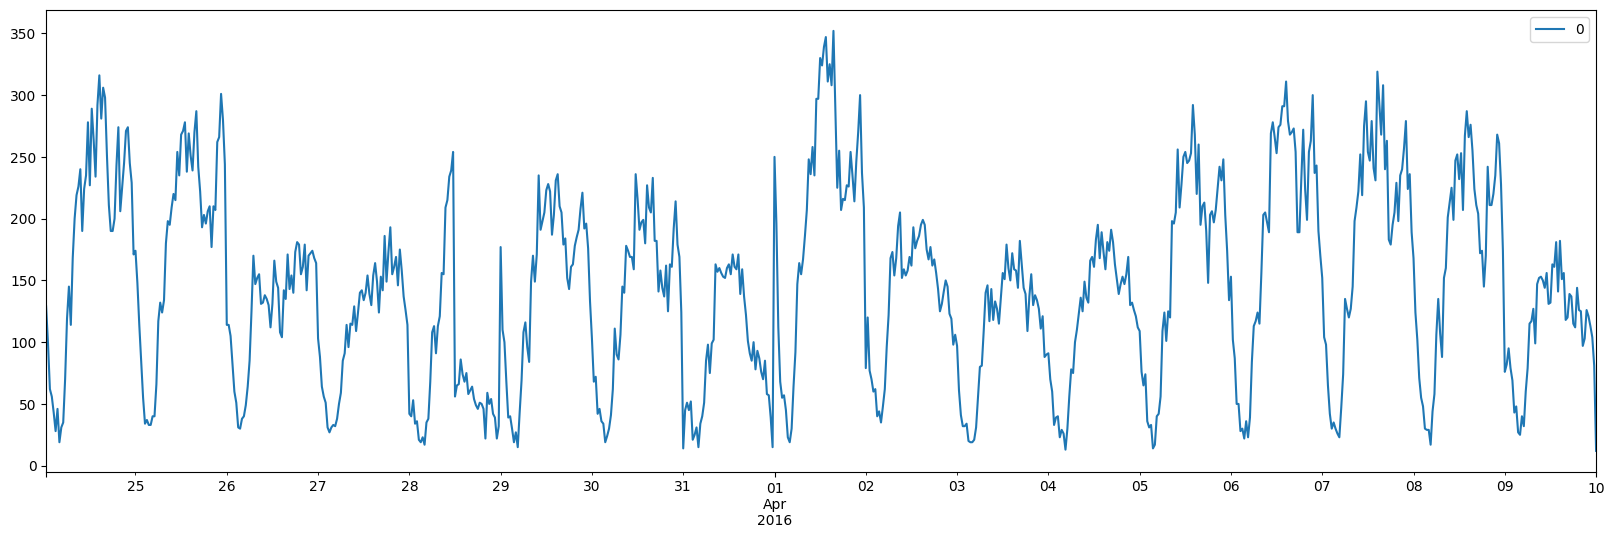

In [23]:
df.iloc[-816:].plot(figsize=(20,6))

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
STL_result = STL(df.iloc[-816:], period=48).fit()

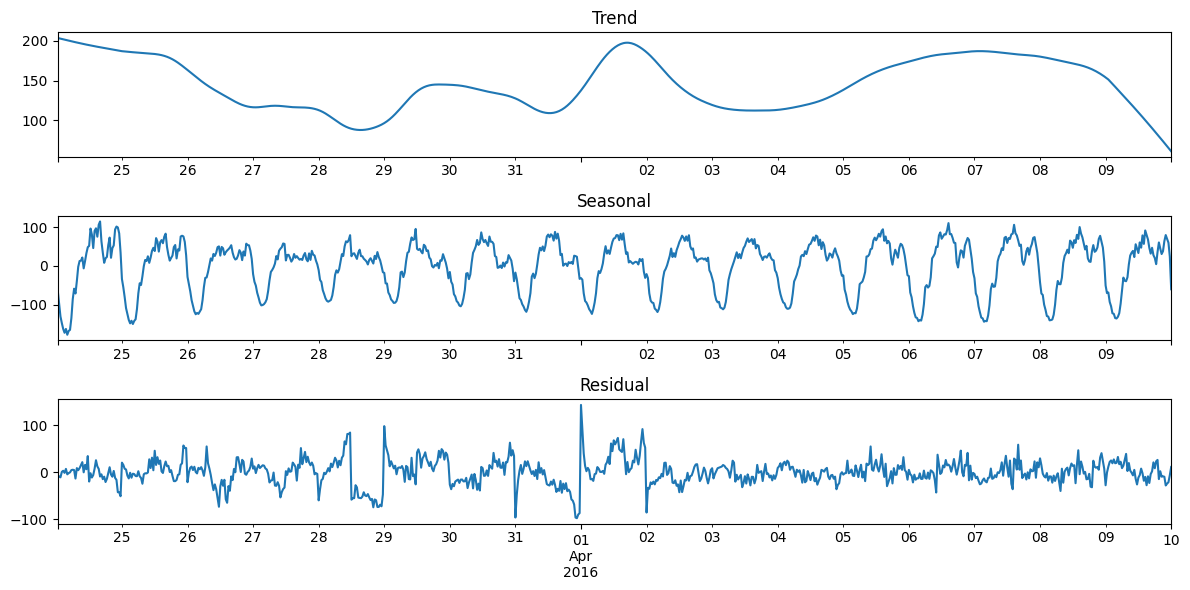

In [25]:

import matplotlib.pyplot as plt


fig, ax = plt.subplots(3,1, figsize=(12,6))
STL_result.trend.plot(title='Trend', ax=ax[0])
STL_result.seasonal.plot(title='Seasonal', ax=ax[1])
STL_result.resid.plot(title='Residual', ax=ax[2])

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

plt.tight_layout()
plt.show()

In [16]:
STL_result.resid

2016-03-24 00:30:00   -3.295537
2016-03-24 01:00:00   -2.617163
2016-03-24 01:30:00    1.554420
2016-03-24 02:00:00   -0.640266
2016-03-24 02:30:00   -4.038979
                         ...   
2016-04-09 22:00:00   -9.689866
2016-04-09 22:30:00    2.160255
2016-04-09 23:00:00   -2.378265
2016-04-09 23:30:00   -2.690934
2016-04-10 00:00:00    7.342022
Name: resid, Length: 816, dtype: float64

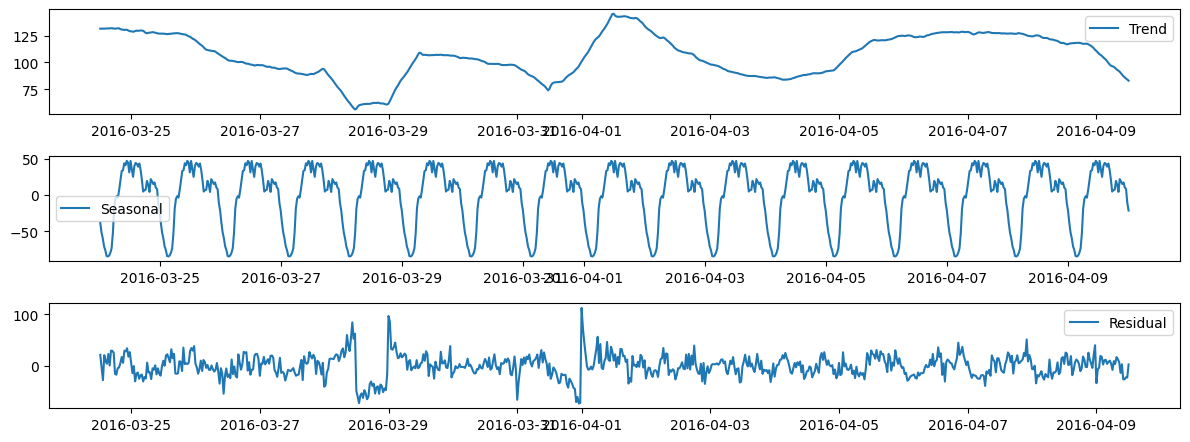

In [17]:
stl_result = seasonal_decompose(df.iloc[-816:], model='additive', period=48)

plt.figure(figsize=(12, 6))



plt.subplot(4, 1, 2)
plt.plot(stl_result.trend, label='Trend')
plt.legend()


plt.subplot(4, 1, 3)
plt.plot(stl_result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(stl_result.resid, label='Residual')
plt.legend()

plt.xticks()

plt.tight_layout()
plt.show()

# 测试函数

In [17]:
from STL_2D import STL_2D

In [18]:
help(STL_2D)

Help on function STL_2D in module STL_2D:

STL_2D(TSI: numpy.ndarray, **kwargs)
    Input:
    TSM: A 3D NumPy array where each dimension contains information for (timeslots,  columns,  rows), respectively.
    See statsmodels.tsa.seasonal.STL for other parameters (https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html).
    
    Output:
    trend_df: DataFrame of trend, indexed by timeslots, each column representing a pixel.
    seasonal_df: DataFrame of season, indexed by timeslots, each column representing a pixel.
    resid_df: DataFrame of residual, indexed by timeslots, each column representing a pixel.



In [19]:
_, _, resid_df = STL_2D(data_np[-816:, 0, :, :], period=48)

  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:37<00:00,  1.18s/it]


In [20]:
# reid_df = resid_df.drop(columns='index')
# resid_df = resid_df.reset_index(drop=True)
print(resid_df)

           0.0       0.0       0.0       0.0       0.0       0.0       0.0  \
0    -0.112260 -0.112420 -0.074743 -0.112298 -0.111997 -0.111527 -0.110884   
1     0.313716  0.427664 -1.371455  0.343826  0.659334  0.967814  0.493192   
2    -2.042670 -0.053589  0.833470 -0.447799 -0.341365  2.203293  0.225142   
3    -0.225250 -0.070054  0.448631 -0.216190  0.218316  0.259310  0.185981   
4     1.897885  0.792722  0.160709  1.093829  1.900961  0.645426  0.719435   
...        ...       ...       ...       ...       ...       ...       ...   
1019  0.406123  0.446598 -0.641189  1.318831 -0.841633 -0.374763 -0.340376   
1020 -0.426625 -1.344119 -1.065007  0.663176  0.784752  0.245036 -0.235977   
1021 -0.441118  1.855241 -0.739905 -0.824013  0.250487 -2.198559 -0.886373   
1022  0.410527 -0.487064 -2.549479  1.237141  1.003257 -1.294073 -0.370473   
1023 -1.579164  0.222894  0.484582 -0.358599  2.109223 -1.037380 -0.204917   

           0.0       0.0       0.0  ...       0.0       0.0    

In [21]:
# reid_df = resid_df.drop(columns='index', axis=1)
res_df = resid_df.reset_index(drop=False)
print(res_df.head())

   index       0.0       0.0       0.0       0.0       0.0       0.0  \
0      0 -0.112260 -0.112420 -0.074743 -0.112298 -0.111997 -0.111527   
1      1  0.313716  0.427664 -1.371455  0.343826  0.659334  0.967814   
2      2 -2.042670 -0.053589  0.833470 -0.447799 -0.341365  2.203293   
3      3 -0.225250 -0.070054  0.448631 -0.216190  0.218316  0.259310   
4      4  1.897885  0.792722  0.160709  1.093829  1.900961  0.645426   

        0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0  \
0 -0.110884 -0.110064 -0.109070  ... -0.007479 -0.007362 -0.007217  0.091994   
1  0.493192  0.491869 -1.222119  ...  2.744843 -3.307031 -1.539022 -1.812622   
2  0.225142  2.152060  1.111304  ...  6.926690  0.538296  3.280935 -1.109972   
3  0.185981  0.560978  0.191088  ...  1.344900  0.351252 -0.681808 -0.262977   
4  0.719435  0.435465  0.727182  ...  0.822596 -2.014279 -1.285657 -2.063145   

        0.0       0.0       0.0       0.0       0.0       0.0  
0 -0.160175 -0.006659 

In [22]:
res_df.to_csv(r'output/resid_result.csv')

# 测试转图像

In [23]:
import pandas as pd
import STL_2D

In [24]:
res_df = pd.read_csv(r'output/resid_result.csv')
print(res_df.head())

   Unnamed: 0  index       0.0     0.0.1     0.0.2     0.0.3     0.0.4  \
0           0      0 -0.112260 -0.112420 -0.074743 -0.112298 -0.111997   
1           1      1  0.313716  0.427664 -1.371455  0.343826  0.659334   
2           2      2 -2.042670 -0.053589  0.833470 -0.447799 -0.341365   
3           3      3 -0.225250 -0.070054  0.448631 -0.216190  0.218316   
4           4      4  1.897885  0.792722  0.160709  1.093829  1.900961   

      0.0.5     0.0.6     0.0.7  ...   0.0.726   0.0.727   0.0.728   0.0.729  \
0 -0.111527 -0.110884 -0.110064  ... -0.007479 -0.007362 -0.007217  0.091994   
1  0.967814  0.493192  0.491869  ...  2.744843 -3.307031 -1.539022 -1.812622   
2  2.203293  0.225142  2.152060  ...  6.926690  0.538296  3.280935 -1.109972   
3  0.259310  0.185981  0.560978  ...  1.344900  0.351252 -0.681808 -0.262977   
4  0.645426  0.719435  0.435465  ...  0.822596 -2.014279 -1.285657 -2.063145   

    0.0.730   0.0.731   0.0.732   0.0.733   0.0.734   0.0.735  
0 -0.16017

In [30]:
columns_to_rename = res_df.columns[-816:]
dates_without_colon = [str(date).replace(':', '') for date in dates[-816:]]

print(dates_without_colon[0])

columns_mapping = dict(zip(columns_to_rename, dates_without_colon))
print(columns_mapping)

2016-03-24 003000
{'0.0': '2016-03-24 003000', '0.0.1': '2016-03-24 010000', '0.0.2': '2016-03-24 013000', '0.0.3': '2016-03-24 020000', '0.0.4': '2016-03-24 023000', '0.0.5': '2016-03-24 030000', '0.0.6': '2016-03-24 033000', '0.0.7': '2016-03-24 040000', '0.0.8': '2016-03-24 043000', '0.0.9': '2016-03-24 050000', '0.0.10': '2016-03-24 053000', '0.0.11': '2016-03-24 060000', '0.0.12': '2016-03-24 063000', '2.0': '2016-03-24 070000', '2.0.1': '2016-03-24 073000', '0.0.13': '2016-03-24 080000', '0.0.14': '2016-03-24 083000', '1.0': '2016-03-24 090000', '0.0.15': '2016-03-24 093000', '1.0.1': '2016-03-24 100000', '2.0.2': '2016-03-24 103000', '0.0.16': '2016-03-24 110000', '0.0.17': '2016-03-24 113000', '0.0.18': '2016-03-24 120000', '1.0.2': '2016-03-24 123000', '0.0.19': '2016-03-24 130000', '0.0.20': '2016-03-24 133000', '1.0.3': '2016-03-24 140000', '0.0.21': '2016-03-24 143000', '0.0.22': '2016-03-24 150000', '0.0.23': '2016-03-24 153000', '0.0.24': '2016-03-24 160000', '0.0.25': '2

In [31]:
res_df.rename(columns=columns_mapping, inplace=True)
res_df.head()

,Unnamed: 0,index,2016-03-24 003000,2016-03-24 010000,2016-03-24 013000,2016-03-24 020000,2016-03-24 023000,2016-03-24 030000,2016-03-24 033000,2016-03-24 040000,...,2016-04-09 193000,2016-04-09 200000,2016-04-09 203000,2016-04-09 210000,2016-04-09 213000,2016-04-09 220000,2016-04-09 223000,2016-04-09 230000,2016-04-09 233000,2016-04-10 000000
0,0,0,-0.112260,-0.112420,-0.074743,-0.112298,-0.111997,-0.111527,-0.110884,-0.110064,...,-0.007479,-0.007362,-0.007217,0.091994,-0.160175,-0.006659,-0.006440,-0.006209,-0.005969,-0.005724
1,1,1,0.313716,0.427664,-1.371455,0.343826,0.659334,0.967814,0.493192,0.491869,...,2.744843,-3.307031,-1.539022,-1.812622,-2.796938,3.295054,-0.746972,-3.111267,-1.130444,2.209597
2,2,2,-2.042670,-0.053589,0.833470,-0.447799,-0.341365,2.203293,0.225142,2.152060,...,6.926690,0.538296,3.280935,-1.109972,-1.897255,1.727501,2.801076,-5.964433,-6.989518,-0.573564
3,3,3,-0.225250,-0.070054,0.448631,-0.216190,0.218316,0.259310,0.185981,0.560978,...,1.344900,0.351252,-0.681808,-0.262977,-0.042661,-0.206545,-0.397225,-0.406454,0.108181,-0.225601
4,4,4,1.897885,0.792722,0.160709,1.093829,1.900961,0.645426,0.719435,0.435465,...,0.822596,-2.014279,-1.285657,-2.063145,0.411316,-2.017812,-0.197576,-1.224302,-1.418373,0.624582


In [32]:
res_df.to_csv(r'output/resid_result_correct.csv')

In [33]:
STL_2D.Result2Image(res_df, 32, 32, r'output/res_output')

0it [00:00, ?it/s]

818it [00:00, 840.17it/s]


# 测试识别异常

In [34]:
import pandas as pd
import STL_2D

In [35]:
res_df = pd.read_csv(r'output/resid_result_correct.csv')

In [36]:
anomaly_df = STL_2D.TukeyAnomalyDetection(res_df)

1024it [00:23, 42.70it/s]


In [37]:
STL_2D.Result2Image(anomaly_df, 32, 32, r'output/anomaly_output')

819it [00:00, 885.69it/s]
